In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Extract Zipped dataset folder

In [ ]:
import zipfile
zip_file_path = '/content/drive/MyDrive/wail/PlantVillage1.zip'
extract_folder = '/content/sample_data/PlantVillage'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Successfully extracted contents to {extract_folder}")

Successfully extracted contents to /content/sample_data/PlantVillage


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds
import cv2
import os

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img

## Dataset

In [ ]:
img_size = (256,256)
data_path = "/content/sample_data/PlantVillage/PlantVillage"

In [ ]:
diseases = os.listdir(os.path.join(data_path,'diseaseTrain'))
plants = os.listdir(os.path.join(data_path,'plantTrain'))

#### Plants Dataset

In [ ]:
print("Number of plant types : ",len(plants),'\n',plants)

Number of plant types :  15 
 ['Corn_(maize)', 'Blueberry', 'Tomato', 'Raspberry', 'Soybean', 'Strawberry', 'Pepper,_bell', 'Cherry_(including_sour)', 'Grape', 'Apple', 'Potato', 'background', 'Squash', 'Orange', 'Peach']


#### Diseases Dataset

In [ ]:
print("Number of diseases : ",len(diseases),'\n',diseases)

Number of diseases :  21 
 ['Tomato_mosaic_virus', 'Target_Spot', 'Haunglongbing_(Citrus_greening)', 'healthy', 'Northern_Leaf_Blight', 'Late_blight', 'Septoria_leaf_spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Bacterial_spot', 'Cedar_apple_rust', 'Esca_(Black_Measles)', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Leaf_scorch', 'Black_rot', 'Apple_scab', 'Common_rust_', 'Cercospora_leaf_spot Gray_leaf_spot', 'Early_blight', 'Spider_mites Two-spotted_spider_mite', 'Powdery_mildew', 'Leaf_Mold']


# 1 - First Model : Plant Type Classification


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

### a - Load Train/Test Data For Plant Classification

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 256

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_path, "plantTrain"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_path, "PlantVal"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
)

Found 79135 images belonging to 15 classes.
Found 9835 images belonging to 15 classes.


### b - Create First CNN Model

In [ ]:
image_shape = (256, 256, 3)

model_Plant = Sequential()
model_Plant.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
model_Plant.add(MaxPooling2D((2, 2)))
model_Plant.add(Dropout(0.25))


model_Plant.add(Conv2D(64, (3, 3), activation='relu'))
model_Plant.add(MaxPooling2D((2, 2)))
model_Plant.add(Dropout(0.25))


model_Plant.add(Conv2D(128, (3, 3), activation='relu'))
model_Plant.add(MaxPooling2D((2, 2)))
model_Plant.add(Dropout(0.25))


model_Plant.add(Conv2D(128, (3, 3), activation='relu'))
model_Plant.add(MaxPooling2D((2, 2)))


model_Plant.add(Flatten())


model_Plant.add(Dense(256, activation='relu'))
model_Plant.add(Dropout(0.25))


model_Plant.add(Dense(128, activation='relu'))
model_Plant.add(Dropout(0.25))


model_Plant.add(Dense(15, activation='softmax'))


model_Plant.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

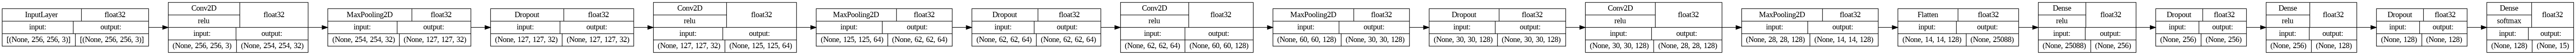

In [ ]:
tf.keras.utils.plot_model(model_Plant,show_shapes=True,
    show_dtype=True,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=True,
    dpi=96,
    show_layer_activations=True)


#### -> Model Summary

In [ ]:
# model = tf.keras.models.load_model('/content/drive/MyDrive/wail/ep230.kera')
model_Plant.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

### c - Train Plant classification Model

In [ ]:
history = model_Plant.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
)

Epoch 1/20
309/309 [==============================] - 379s 1s/step - loss: 1.6897 - accuracy: 0.4387 - val_loss: 1.0977 - val_accuracy: 0.6394
Epoch 2/20
309/309 [==============================] - 318s 1s/step - loss: 0.7314 - accuracy: 0.7628 - val_loss: 0.6087 - val_accuracy: 0.8279
Epoch 3/20
309/309 [==============================] - 336s 1s/step - loss: 0.4478 - accuracy: 0.8559 - val_loss: 0.5265 - val_accuracy: 0.8605
Epoch 4/20
309/309 [==============================] - 335s 1s/step - loss: 0.3288 - accuracy: 0.8955 - val_loss: 0.5406 - val_accuracy: 0.8697
Epoch 5/20
309/309 [==============================] - 321s 1s/step - loss: 0.2564 - accuracy: 0.9186 - val_loss: 0.4852 - val_accuracy: 0.8799
Epoch 6/20
309/309 [==============================] - 318s 1s/step - loss: 0.2147 - accuracy: 0.9318 - val_loss: 0.4534 - val_accuracy: 0.8970
Epoch 7/20
309/309 [==============================] - 321s 1s/step - loss: 0.1759 - accuracy: 0.9433 - val_loss: 0.4474 - val_accuracy: 0.9098

#### -> Save Training History

In [ ]:
import pickle


with open('/content/drive/MyDrive/wail/Plant_Model_History.pkl', 'wb') as file:
    pickle.dump(history, file)

In [ ]:
# import pickle

# with open('/content/drive/MyDrive/wail/Plant_Model_History.pkl', 'rb') as file:
#     loaded_history = pickle.load(file)

# print(loaded_history)

In [ ]:
# combined_history = {}
# combined_history['accuracy'] = loaded_history['accuracy'] + history.history['accuracy']
# combined_history['val_accuracy'] = loaded_history['val_accuracy'] + history.history['val_accuracy']
# combined_history['loss'] = loaded_history['loss'] + history.history['loss']
# combined_history['val_loss'] = loaded_history['val_loss'] + history.history['val_loss']

#### -> Save Plant Classification Model

In [ ]:
model_Plant.save("/content/drive/MyDrive/wail/Plant_Model.keras")

#### -> Plant Classification Model Training History (Accuracy/Loss)



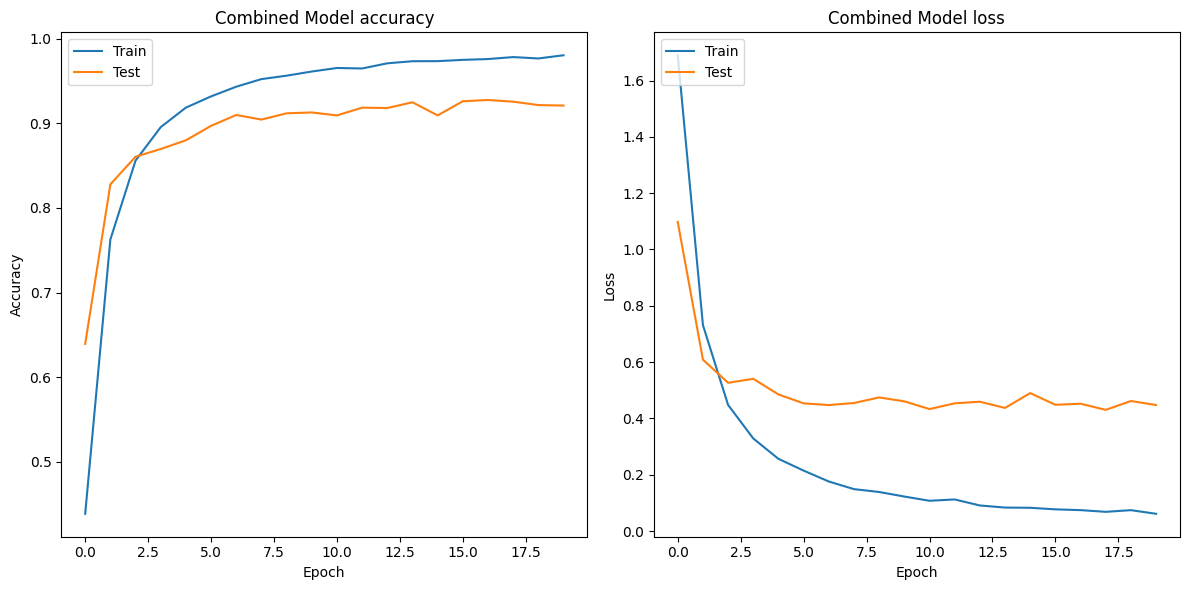

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Combined Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Combined Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

### d - Test Plant Classification Model With Test Data

#### -> Accuracy / Loss

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
test_loss, test_accuracy = model_Plant.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

39/39 [==============================] - 28s 716ms/step - loss: 0.4483 - accuracy: 0.9211
Test Loss: 0.4483039379119873, Test Accuracy: 0.9210981130599976


#### -> Load Test Data

In [ ]:
test_images, test_labels = test_generator.next()

In [ ]:
predictions = model_Plant.predict(test_images)

In [ ]:
yhat = np.argmax(predictions, axis=1).tolist()
ytrue = np.argmax(test_labels, axis=1).tolist()

#### -> Real Value VS Predicted Value

In [ ]:
print("Predicted Class : ",plants[yhat[1]], "  Real Class : ",plants[ytrue[1]])

#### -> Classification Report

In [ ]:
report = classification_report(ytrue, yhat, target_names=[f'{plants[i]}' for i in range(len(plants))])
print(report)

                         precision    recall  f1-score   support

           Corn_(maize)       0.74      0.89      0.81        84
              Blueberry       0.94      1.00      0.97        49
                 Tomato       0.97      0.51      0.67        55
              Raspberry       0.95      0.99      0.97       109
                Soybean       0.97      0.98      0.98       122
             Strawberry       0.98      0.99      0.99       190
           Pepper,_bell       0.83      0.95      0.89        95
Cherry_(including_sour)       0.70      0.91      0.79        65
                  Grape       0.92      0.71      0.80        62
                  Apple       0.60      0.86      0.71         7
                 Potato       0.98      0.98      0.98       132
             background       0.89      0.98      0.93        51
                 Squash       0.98      0.89      0.93        47
                 Orange       0.96      0.89      0.92       407
                  Peach 

#### -> Confusion Matrix

In [ ]:
cm = confusion_matrix(ytrue, yhat)

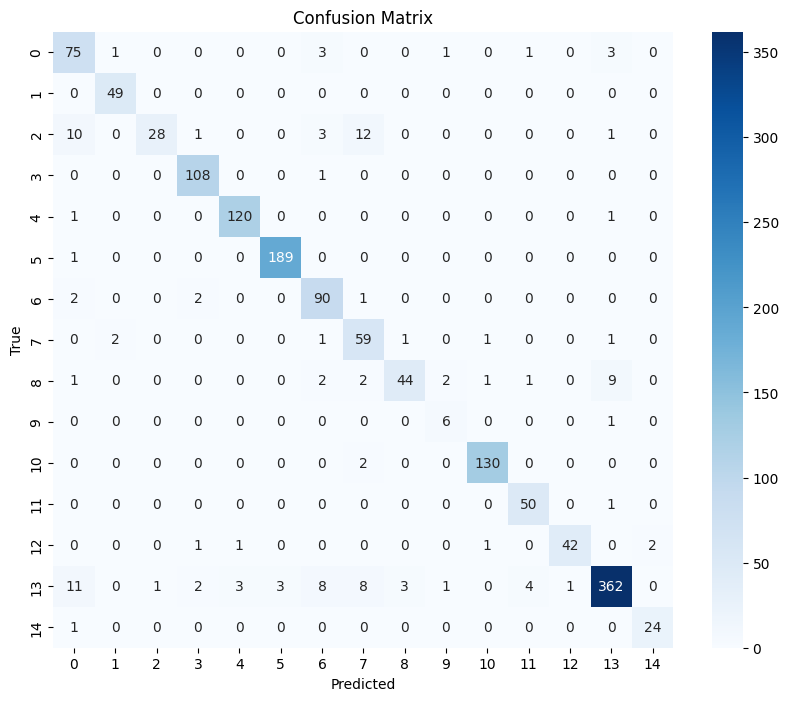

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(15), yticklabels=range(15))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 2 - Second Model : Disease Classification


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

### a - Load Train/Test Data for Disease Classification Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 128

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_path, "diseaseTrain"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_path, "diseaseVal"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
)

Found 103681 images belonging to 21 classes.
Found 6820 images belonging to 21 classes.


### b - Create Disease Classification Model

In [ ]:
image_shape = (256, 256, 3)

model_Disease = Sequential()
model_Disease.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
model_Disease.add(MaxPooling2D((2, 2)))
model_Disease.add(Dropout(0.25))


model_Disease.add(Conv2D(64, (3, 3), activation='relu'))
model_Disease.add(MaxPooling2D((2, 2)))
model_Disease.add(Dropout(0.25))


model_Disease.add(Conv2D(128, (3, 3), activation='relu'))
model_Disease.add(MaxPooling2D((2, 2)))
model_Disease.add(Dropout(0.25))


model_Disease.add(Conv2D(256, (3, 3), activation='relu'))
model_Disease.add(MaxPooling2D((2, 2)))


model_Disease.add(Flatten())


model_Disease.add(Dense(512, activation='relu'))
model_Disease.add(Dropout(0.25))


model_Disease.add(Dense(256, activation='relu'))
model_Disease.add(Dropout(0.25))


model_Disease.add(Dense(21, activation='softmax'))


model_Disease.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

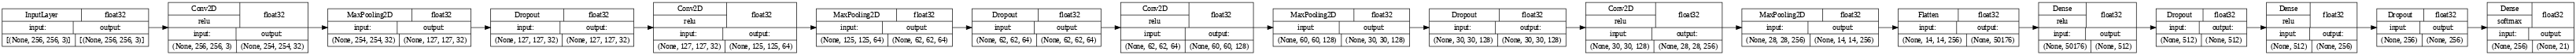

In [ ]:
tf.keras.utils.plot_model(model_Disease,show_shapes=True,
    show_dtype=True,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=True,
    dpi=50,
    show_layer_activations=True)


### d - Train Disease Classification Model

In [ ]:
history = model_Disease.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
)

Epoch 1/20
810/810 [==============================] - 519s 613ms/step - loss: 1.4012 - accuracy: 0.5532 - val_loss: 0.7074 - val_accuracy: 0.7624
Epoch 2/20
810/810 [==============================] - 424s 524ms/step - loss: 0.6098 - accuracy: 0.8018 - val_loss: 0.6153 - val_accuracy: 0.7863
Epoch 3/20
810/810 [==============================] - 418s 515ms/step - loss: 0.4384 - accuracy: 0.8559 - val_loss: 0.3601 - val_accuracy: 0.8868
Epoch 4/20
810/810 [==============================] - 417s 514ms/step - loss: 0.3444 - accuracy: 0.8868 - val_loss: 0.2973 - val_accuracy: 0.9001
Epoch 5/20
810/810 [==============================] - 426s 526ms/step - loss: 0.2903 - accuracy: 0.9038 - val_loss: 0.2580 - val_accuracy: 0.9152
Epoch 6/20
810/810 [==============================] - 415s 512ms/step - loss: 0.2484 - accuracy: 0.9189 - val_loss: 0.2427 - val_accuracy: 0.9210
Epoch 7/20
810/810 [==============================] - 415s 512ms/step - loss: 0.2130 - accuracy: 0.9299 - val_loss: 0.2285 -

#### -> Save Training History

In [ ]:
import pickle


with open('/content/drive/MyDrive/wail/Disease_Model_History.pkl', 'wb') as file:
    pickle.dump(history, file)

#### -> Save Disease Classification Model

In [ ]:
model_Disease.save("/content/drive/MyDrive/wail/Disease_Model.keras")

#### -> Disease Classification Model Training History (Accuracy/Loss)

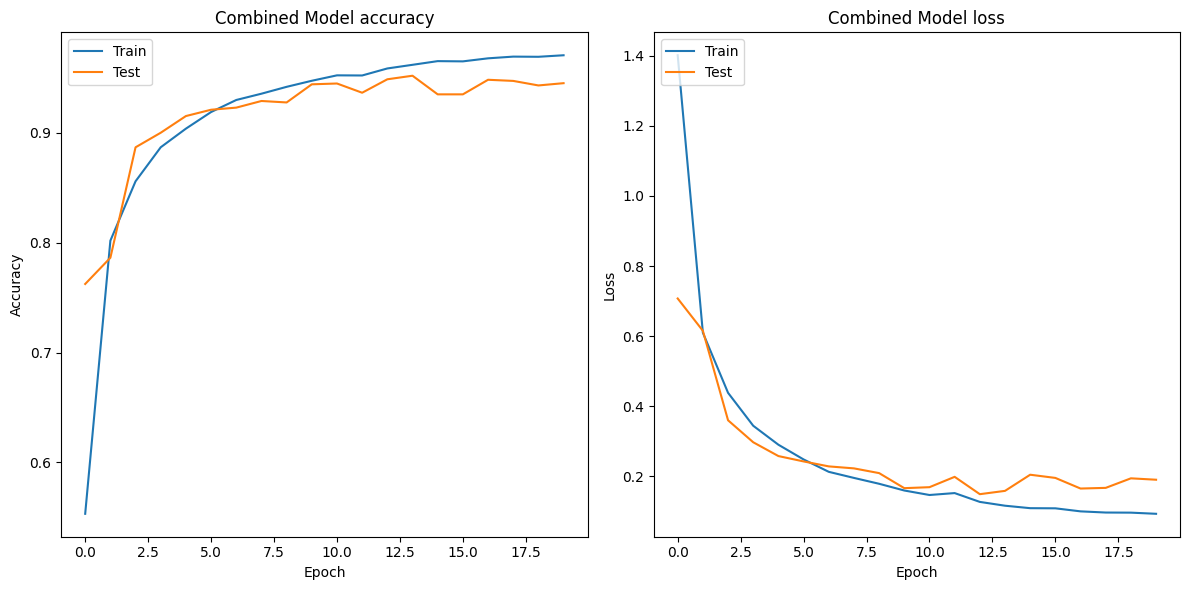

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Combined Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Combined Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

### d - Test Disease Classification Model With Test Data

#### -> Accuracy / Loss

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
test_loss, test_accuracy = model_Disease.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

54/54 [==============================] - 25s 460ms/step - loss: 0.1900 - accuracy: 0.9452
Test Loss: 0.19004005193710327, Test Accuracy: 0.9451612830162048


#### -> Load Test Data

In [ ]:
test_images, test_labels = test_generator.next()

predictions = model_Disease.predict(test_images)

yhat = np.argmax(predictions, axis=1).tolist()
ytrue = np.argmax(test_labels, axis=1).tolist()

32/32 [==============================] - 1s 40ms/step


#### -> Real Value VS Predicted Value

In [ ]:
print("Predicted Class : ",diseases[yhat[1]], "  Real Class : ",diseases[ytrue[1]])

Predicted Class :  Leaf_scorch   Real Class :  Leaf_scorch


#### -> Classification Report

In [ ]:
len(diseases)

21

In [ ]:
report = classification_report(ytrue, yhat, target_names=[f'{diseases[i]}' for i in range(len(diseases))])
print(report)

                                      precision    recall  f1-score   support

                 Tomato_mosaic_virus       0.76      0.93      0.84        14
                         Target_Spot       0.96      0.86      0.91        90
     Haunglongbing_(Citrus_greening)       0.93      1.00      0.96        64
                             healthy       0.80      1.00      0.89         4
                Northern_Leaf_Blight       0.94      0.83      0.88        18
                         Late_blight       1.00      1.00      1.00        29
                  Septoria_leaf_spot       0.96      0.89      0.93        56
       Tomato_Yellow_Leaf_Curl_Virus       1.00      0.98      0.99        41
                      Bacterial_spot       0.89      1.00      0.94        84
                    Cedar_apple_rust       0.95      0.95      0.95        61
                Esca_(Black_Measles)       0.96      0.96      0.96        24
  Leaf_blight_(Isariopsis_Leaf_Spot)       1.00      0.98      

#### -> Confusion Matrix

In [ ]:
cm = confusion_matrix(ytrue, yhat)

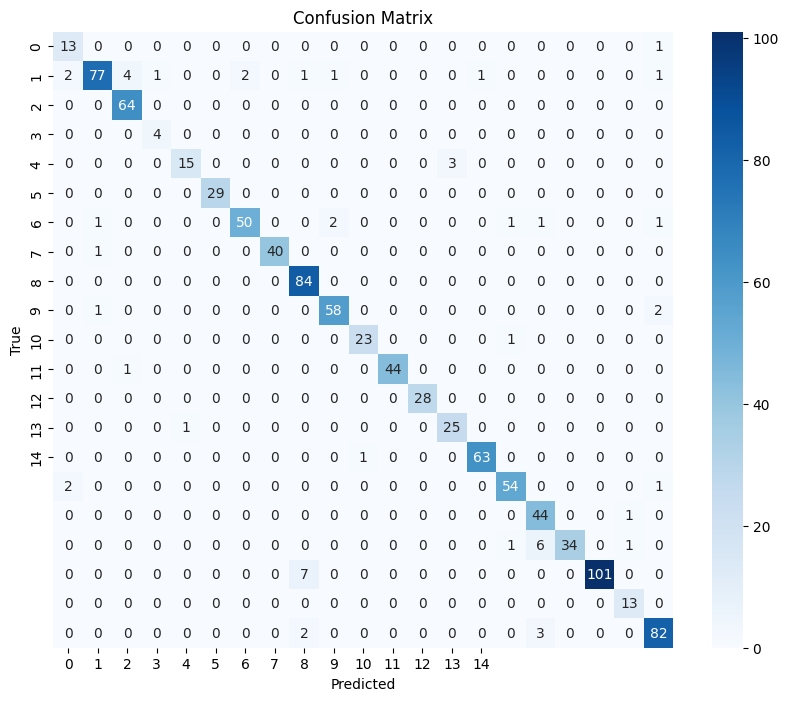

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(15), yticklabels=range(15))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard


log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = GlobalAveragePooling2D()(base_model.output)

model = Model(inputs=base_model.input, outputs=x)


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:


num_classes = len(classes)

x = Dense(256, activation='relu')(model.output)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=model.input, outputs=predictions)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
loaded_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[tb_callback]
)

Epoch 1/20
42/42 [==============================] - 195s 5s/step - loss: 0.5355 - accuracy: 0.8337 - val_loss: 0.6812 - val_accuracy: 0.7927
Epoch 2/20
42/42 [==============================] - 192s 5s/step - loss: 0.5352 - accuracy: 0.8339 - val_loss: 0.6885 - val_accuracy: 0.7893
Epoch 3/20
42/42 [==============================] - 188s 4s/step - loss: 0.5434 - accuracy: 0.8316 - val_loss: 0.6743 - val_accuracy: 0.7937
Epoch 4/20
42/42 [==============================] - 191s 5s/step - loss: 0.5380 - accuracy: 0.8322 - val_loss: 0.6806 - val_accuracy: 0.7896
Epoch 5/20
42/42 [==============================] - 191s 5s/step - loss: 0.5344 - accuracy: 0.8340 - val_loss: 0.6759 - val_accuracy: 0.7933
Epoch 6/20
42/42 [==============================] - 188s 4s/step - loss: 0.5377 - accuracy: 0.8325 - val_loss: 0.6981 - val_accuracy: 0.7810
Epoch 7/20
42/42 [==============================] - 192s 5s/step - loss: 0.5428 - accuracy: 0.8306 - val_loss: 0.6994 - val_accuracy: 0.7850
Epoch 8/20
42

In [ ]:
model.save("/content/drive/MyDrive/wail/PDResnet50-ep230.kera")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save model to Google Drive
loaded_model.save('/content/drive/MyDrive/wail/PDResnet50-ep230.keras')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/wail/ep20.keras')

OSError: ignored

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

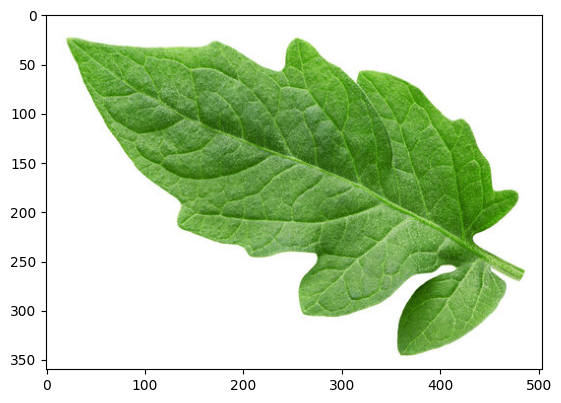

In [ ]:
image = plt.imread("tomato.jpg")
plt.imshow(image)

In [ ]:
images = []

In [ ]:
image = load_img("potato.png", target_size=(256,256))
image = img_to_array(image)/255.0
images.append(image)

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load and preprocess a single image
img_path = '/content/aug_4_85e9bd6d-29f1-4ee1-a5ba-d2d35ee8d440___RS_L.Scorch 1218.JPG'
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
# img_array = preprocess_input(img_array)


FileNotFoundError: ignored

In [ ]:
pr = model.predict(img_array)

1/1 [==============================] - 0s 105ms/step


In [ ]:
pr

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:
plants[np.argmax(pr[0])]

'Cherry_(including_sour)'

In [ ]:
test_loss, test_accuracy = loaded_model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


NameError: ignored

In [ ]:
test_images, test_labels = test_generator.next()

In [ ]:
predictions = model.predict(test_images)

2/2 [==============================] - 1s 12ms/step


In [ ]:
predictions

array([[2.56635353e-08, 6.44186185e-16, 7.42975161e-21, 9.99609530e-01,
        5.16366108e-15, 1.31902278e-17, 2.74164857e-10, 4.58428842e-15,
        1.32887041e-18, 4.50430308e-24, 5.57116886e-21, 3.88767483e-04,
        1.73679143e-06, 1.85719509e-10, 2.34975985e-08],
       [6.20343377e-09, 4.58508509e-10, 2.14786744e-10, 1.49088387e-17,
        1.07138409e-10, 9.99994278e-01, 2.65338347e-08, 8.67070398e-08,
        4.05422368e-15, 1.86355702e-17, 1.39098618e-12, 7.94260298e-22,
        9.06840819e-17, 5.61140905e-06, 1.40026608e-19],
       [4.06566163e-04, 7.93900767e-07, 2.99871899e-05, 4.38388770e-06,
        9.79194105e-01, 1.99786795e-04, 6.04553148e-04, 8.31018144e-04,
        2.57585343e-05, 9.62356920e-04, 9.40582595e-06, 8.94715195e-05,
        1.40680512e-03, 1.61754806e-02, 5.95826968e-05],
       [2.12012008e-02, 5.67501690e-03, 7.13435526e-04, 8.09881021e-05,
        8.84492474e-04, 3.93054076e-02, 4.50563014e-01, 1.07742762e-02,
        7.83225405e-04, 1.26471889e-0

In [ ]:
yhat = np.argmax(predictions, axis=1).tolist()
ytrue = np.argmax(test_labels, axis=1).tolist()

'Strawberry'

'Strawberry'

In [ ]:


from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
multilabel_confusion_matrix(ytrue, yhat)

array([[[53,  4],
        [ 1,  6]],

       [[59,  0],
        [ 0,  5]],

       [[58,  2],
        [ 3,  1]],

       [[58,  0],
        [ 1,  5]],

       [[61,  0],
        [ 0,  3]],

       [[53,  2],
        [ 0,  9]],

       [[58,  2],
        [ 1,  3]],

       [[60,  0],
        [ 3,  1]],

       [[60,  2],
        [ 0,  2]],

       [[63,  0],
        [ 0,  1]],

       [[58,  0],
        [ 0,  6]],

       [[63,  0],
        [ 0,  1]],

       [[62,  0],
        [ 0,  2]],

       [[53,  1],
        [ 4,  6]]])

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(ytrue, yhat)
cm

array([[6, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 6]])

In [ ]:
cr = classification_report(ytrue, yhat)
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       1.00      1.00      1.00         5
           2       0.33      0.25      0.29         4
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         3
           5       0.82      1.00      0.90         9
           6       0.60      0.75      0.67         4
           7       1.00      0.25      0.40         4
           8       0.50      1.00      0.67         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       0.86      0.60      0.71        10

    accuracy                           0.80        64
   macro avg       0.84      0.82      0.80        64
weighted avg       0.83      0.80      0.79        64



In [ ]:
import pandas as pd

report = classification_report(ytrue, yhat, target_names=[f'Class {i}' for i in range(len(plants))])
print(report)

# Convert the classification report to a Pandas DataFrame for better visualization
report_dict = classification_report(ytrue, yhat, target_names=[f'Class {i}' for i in range(len(plants))], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
print(report_df)

              precision    recall  f1-score   support

     Class 0       0.28      0.68      0.39        34
     Class 1       0.86      1.00      0.92        12
     Class 2       0.62      0.33      0.43        24
     Class 3       0.92      0.95      0.93        37
     Class 4       0.87      0.95      0.91        41
     Class 5       1.00      0.97      0.98        63
     Class 6       0.42      0.93      0.58        14
     Class 7       0.62      0.91      0.74        23
     Class 8       0.67      0.74      0.70        27
     Class 9       0.50      1.00      0.67         3
    Class 10       0.96      0.84      0.89        55
    Class 11       0.63      1.00      0.78        19
    Class 12       0.82      0.88      0.85        16
    Class 13       1.00      0.35      0.51       124
    Class 14       1.00      0.88      0.93         8

    accuracy                           0.73       500
   macro avg       0.74      0.83      0.75       500
weighted avg       0.83   

In [ ]:
print("Classification Report:\n", classification_report(ytrue, yhat))

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.68      0.39        34
           1       0.86      1.00      0.92        12
           2       0.62      0.33      0.43        24
           3       0.92      0.95      0.93        37
           4       0.87      0.95      0.91        41
           5       1.00      0.97      0.98        63
           6       0.42      0.93      0.58        14
           7       0.62      0.91      0.74        23
           8       0.67      0.74      0.70        27
           9       0.50      1.00      0.67         3
          10       0.96      0.84      0.89        55
          11       0.63      1.00      0.78        19
          12       0.82      0.88      0.85        16
          13       1.00      0.35      0.51       124
          14       1.00      0.88      0.93         8

    accuracy                           0.73       500
   macro avg       0.74      0.83      0.75       500
we

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(15), yticklabels=range(15))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

NameError: ignored

<Figure size 1000x800 with 0 Axes>

In [ ]:
classes[20]

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'